## Visualization and analysis of an Electrocardiogram Signal

This exercise will take you step by step in the process of reading, displaying and analysing in a simple way a signal of an Electrocardiogram. This exercise is parallel to a Matlab Live Script of the same name and function. The script was awarded third place in the MATLAB Online Live Editor Challenge:

https://blogs.mathworks.com/loren/2018/09/05/winners-of-the-matlab-online-live-editor-challenge/


An electrocardiogram, also known as ECG or EKG, is an electrical signal that is produced as the heart beats. The ECG is widely used as it can quickly reveal the health of the heart as well as a variety of conditions  such as arrhythmias, infarction or tachycardia.

Let's first of all see what ECGs look like. Wikipedia has nice ECG images, like the one below which was uploaded to Wikipedia by MoodyGroove  on 2007-01-24. However, before displaying it is necessary to import several commands:

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

Now it is possible to retrieve and display the ECG:

In [11]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/bd/12leadECG.jpg", width=700)

To proceed with the analysis, we need to read the data of an ECG.

The website of Professor Rangaraj M. Rangayyan (http://people.ucalgary.ca/~ranga/) contains a large number of biomedical signals. If you follow the section "Lecture notes, lab exercises, and signal data files" you will find a large number of signals from different acquisition modalities (ECG, EEG, EMF, etc.). You can save the files from a browser to your hard drive and then open with the command load as above. Alternatively, you can also read the data sets directly. The following lines will show you how to do this.

First, let's import a few things:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [26]:
urlAddress    ='http://people.ucalgary.ca/~ranga/enel563/SIGNAL_DATA_FILES/ecgpvc.dat'

In [28]:
with urllib.request.urlopen(urlAddress) as url:
                wholeURL = url.read().decode('utf-8')

In [31]:
type(wholeURL)

str

In [33]:
len(wholeURL)

850000

NameError: name 'top' is not defined

In [25]:
data_ECG     = float(wholeURL[0:15])
type(data_ECG)
print(data_ECG)

2.028


TypeError: string indices must be integers

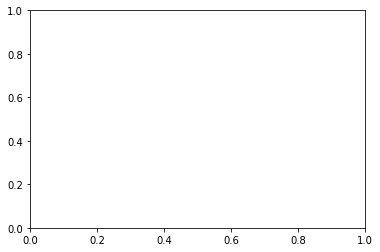

In [19]:
fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(wholeURL[1,1000], linestyle='-', color='b')